<a href="https://colab.research.google.com/github/leenago/Projects/blob/master/KDX/MBN_%EB%89%B4%EC%8A%A4%EB%8D%B0%EC%9D%B4%ED%84%B0__%ED%98%84%EA%B2%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/Shared drives/청년취업아카데미_KDX한국데이터거래소/Data/MBN 뉴스 데이터

/content/gdrive/Shared drives/청년취업아카데미_KDX한국데이터거래소/Data/MBN 뉴스 데이터


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.5MB/s 
     |████████████████████████████████| 3.8MB 38.3MB/s 
     |████████████████████████████████| 92kB 10.2MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


#### 구글 드라이브 마운트

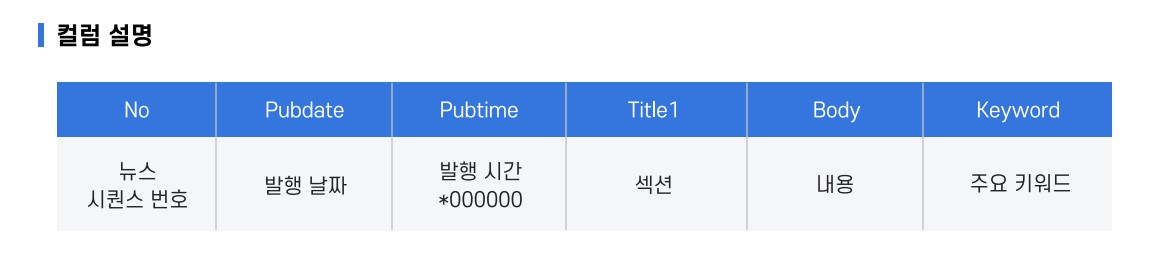

In [ ]:
mk_news = pd.read_excel('mk_news_201901_202006.xlsx')
mk_news

In [ ]:
mk = mk_news.copy()

mk.columns

Index(['no', 'pubdate', 'pubtime', 'title1', 'body', 'keywords'], dtype='object')

In [ ]:
#내용 중복 제거
new_mk = mk.drop_duplicates(['title1','body'], keep='first', ignore_index = True)
len(new_mk)

297623

In [ ]:
#title1에 있는 카테고리는 총 174개
new_mk['title1'].unique()

array(['사회일반', '출판/도서', '테마기획', '의약/건강', '중견/중소기업', '증권계동향', '노동/노사',
       '경제일반', '문화산업', '공연/전시/음악', '신문/방송', '바둑', '기자24시', '매경칼럼', '사외칼럼',
       '인물/인터뷰', '인사', '사설', '아파트/분양', '신도시/토지', '유통·섬유·음식료', '외환·환율',
       '금융정책·일반', '카드·캐피털', '과학기술/특허', '사고/알림', '경기/지표', '정치일반', '해외증시',
       '채권/펀드', '국제금융', '국제경제', '국제산업', '국제정치', '항공·해운', '자동차', '기업 경영',
       '축구', '골프', '레저/관광', '기업정보', '남북관계', '외교·국방', '시세/시황', '법원·검찰·경찰',
       '교통/환경/날씨', '카툰', '핫이슈', '방송/TV', '가요', '사건·사고', '기타', '야구',
       '컴퓨터/정보통신', '무역/통상', nan, '세금', '국제사회', '전기·전자·통신', '국제사건/사고',
       'Economy', '헬스저널', '기업일반·재계동향', '교육', '건설업계 동향', '보건/복지', 'Seoul',
       '스포츠(기타)', '중공업·기계·금속', '지역경제', '부음', '행정·지자체', '취업/채용', '공시',
       '은행', '상가/오피스텔', '보험', '시황', '칼럼', '창업', 'Asia', 'Market',
       'CONSUMER JOURNAL', '저축은행·기타', '포토', 'Biz', '세제/정책', '화학·에너지',
       'Cover Story', 'Review&Observation', 'Photos', '벤쳐/벤쳐캐피탈',
       '재개발/재건축', '증권정책', '당좌거래 정지', '영화', 'THE BIZ TIMES',
       'Money & Rich

In [ ]:
new_mk.isnull().sum()

no               0
pubdate          0
pubtime          1
title1        9541
body             2
keywords    141268
dtype: int64

### 데이터 정제

In [ ]:
#body의 1번째에 해당하는 값을 300자까지 출력
example = new_mk['body'][1][:300]
type(example)

str

In [ ]:
import re
example1 = re.sub('[^ㄱ-힣A-Z]',' ',example )
example1

'                           야바위 게임   마이클 슈월비 지음   노정태 옮김    만    원  도덕의 문제로 불평등의 심각함을 말할 수 있다고 주장하는 책  슈월비는 불평등 구조를 유지하며 도덕과 부의 문제를 일으키는  있는 자 들의  가지 기본 법칙을 소개한다  문예출판사 펴냄    직장인의 바른 습관   문성후 지음    만    원 주   시간 근무제라는 새로운 업무 환경에 직면한 직장인들의 일과 삶에 꼭 필요한 습관을 담은 직장 생활 지침서다  이지퍼블리싱 펴냄    마취의 시대   로랑 드 쉬테르 '

In [ ]:
#모든 body에 대해 정규화 진행
news_sub = []

for i in range(len(new_mk)):
  news_sub.append(re.sub('[^ㄱ-힣A-Z]',' ', str(new_mk['body'][i])))

new_mk['정규화'] = news_sub

In [ ]:
new_mk['정규화'][10]

'       경제기상도                              올해 유통업계 키워드는 온라인이다  백화점과 대형마트 등 성장을 주도해왔던 오프라인 업체들이 부진해 소매시장 성장률은 크게 둔화될 것으로 보인다  이경희 이마트 유통산업연구소 팀장은  소매구조가 온라인과 소형 포맷 중심으로 빠르게 재편돼 올해 소매시장 성장률 둔화가 예상된다 며      년 소매시장은      성장한 반면  올해에는      성장이 전망된다 고 밝혔다  오프라인 매장 대신 온라인으로 구매하는 온라인 쇼핑이 대세로 자리 잡으면서 온라인 선점 경쟁에는 불이 붙는다   지난해 소셜커머스 쿠팡이 소프트뱅크에서  조원의 추가 투자를 유치하고  오픈마켓   번가가 국민연금 등에서     억원의 자금을 끌어오면서 시작된 투자 경쟁이 올해 실전에서 본격화된다  투자를 등에 업은 업체들이 공격적인 마케팅을 펼치고  물류 창고 등을 신설해 배송 서비스를 혁신하면 온라인 쇼핑 경쟁이 더 치열해질 전망이다  롯데쇼핑은  조원 투자를 예고했고  신세계는  조원을 투자받아 오는  월 이커머스 신설 법인을 출범한다  정연승 단국대 경영학부 교수에 따르면     년 기준으로 이미  커머스 시장 매출액   조    억원 이 대형마트 매출액   조    억원 에 육박한다  정 교수는  인공지능 등 첨단기술을 집약한 플랫폼을 기반으로 검색 결제 배송을 하나의 플랫폼에서 해결하는 커머스    시대로 접어들 것 으로 내다봤다   오프라인 매장 중에서는 편의점 등 집에서 가까워 손쉽게 들르는  스몰 포맷  매장이 경쟁력을 유지할 가능성이 높다  대한상공회의소가 발간한      유통산업 통계집에 따르면     년 기준 편의점        다음으로 무점포 소매       의 판매액 증가율이 높았고 슈퍼마켓      과 백화점         대형마트      는 부진했다  다만 최저임금 인상 여파로 편의점 출점 속도는 작년에 이미 크게 둔화됐다  최저임금 인상분이 상품 가격에 반영되면 물가 상승폭도 다소 커질 수

### 필요베이스 설치

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
import konlpy
from konlpy.tag import Kkma
kkma = Kkma()

In [ ]:
#!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

In [ ]:
#%cd Mecab-ko-for-Google-Colab/

In [ ]:
#!bash install_mecab-ko_on_colab190912.sh

In [ ]:
new_mk.head(10)

,no,pubdate,pubtime,title1,body,keywords,정규화
0,2304119,20200312,0.0,사회일반,NaN,NaN,
1,3937779,20190112,0.0,출판/도서,<!--[[--image0--]]//--> ◆ 야바위 게임 / 마이클 슈월비 지음...,"신간,소개",야바위 게임 마이클 슈월비 지음...
2,3953320,20190101,0.0,테마기획,◆ 2019 경제기상도 / 부동산 ◆ \n <!--[[--image0--]]//--...,"ㅈ,ㅈ",경제기상도 부동산 ...
3,3953321,20190101,0.0,테마기획,◆ 2019 경제기상도 / 금리 ◆ \n <!--[[--image0--]]//-->...,"금리,경제기상도",경제기상도 금리 ...
4,3953324,20190101,0.0,테마기획,<!--[[--image0--]]//--> '황금돼지해'인 2019년 기해년(己亥...,"경제,성장,경제기상도",황금돼지해 인 년 기해년 己亥...
5,3953326,20190101,0.0,테마기획,◆ 2019 경제기상도 ◆ \n <!--[[--image0--]]//--> 섬유업계...,"섬유,업계",경제기상도 섬유업계는...
6,3953327,20190101,0.0,테마기획,◆ 2019 경제기상도 ◆ \n <!--[[--image0--]]//--> 2019...,"중국,철강",경제기상도 년...
7,3953328,20190101,0.0,테마기획,◆ 2019 경제기상도 ◆\n <!--[[--image0--]]//--> 조선업황은...,"조선,해운",경제기상도 조선업황은 ...
8,3953329,20190101,0.0,테마기획,◆ 2019 경제기상도 ◆\n <!--[[--image0--]]//--> 올해 석유...,"새해,업종전망",경제기상도 올해 석유화...
9,3953330,20190101,0.0,테마기획,◆ 2019 경제기상도 ◆\n <!--[[--image0--]]//--> 항공업종은...,"경제,전망",경제기상도 항공업종은 ...


#### 토큰화

In [ ]:
#okt가 kkma보다 상대적으로 명사를 정확하게 분류하기 때문에, okt 토큰을 사용하여 진행한다.
okt_tokens = okt.morphs(new_mk['정규화'][50])
okt_tokens

['쥐',
 '실험',
 '결과',
 '를',
 '통해',
 '기존',
 '약',
 '보다',
 '효과',
 '가',
 '더',
 '뛰어남을',
 '확인',
 '했다',
 'SCI',
 '과학기술',
 '논문',
 '인용',
 '색인',
 '급',
 '논문',
 '게재',
 '로',
 '약',
 '효과',
 '가',
 '과학',
 '적',
 '으로',
 '입증',
 '됐다',
 '일부',
 '병원',
 '이나',
 '한의원',
 '이',
 '쥐',
 '를',
 '이용',
 '한',
 '실험',
 '을',
 '통해',
 '얻는',
 '효능',
 '을',
 '토대',
 '로',
 '작성',
 '한',
 '몇',
 '편의',
 '논문',
 '을',
 '가지',
 '고',
 '자신',
 '들',
 '이',
 '사용',
 '하는',
 '약제',
 '나',
 '치료법',
 '이',
 '뛰어나다고',
 '홍보',
 '하는',
 '사례',
 '가',
 '적지',
 '않다',
 '하지만',
 '쥐',
 '실험',
 '결과',
 '가',
 '사람',
 '에게도',
 '그대로',
 '적용',
 '되지',
 '않는',
 '만큼',
 '실험',
 '결과',
 '를',
 '과',
 '신하',
 '는',
 '것',
 '은',
 '지',
 '양해',
 '야',
 '한다는',
 '지적',
 '이다',
 '일반',
 '적',
 '으로',
 '신약',
 '개발',
 '은',
 '엄격한',
 '임상시험',
 '을',
 '거쳐야',
 '한다',
 '과학자',
 '들',
 '은',
 '실제',
 '임상시험',
 '에',
 '들어가기',
 '전',
 '에',
 '쥐',
 '실험',
 '을',
 '통해',
 '사전',
 '에',
 '부작용',
 '이나',
 '독성',
 '을',
 '평가',
 '한다',
 '임상시험',
 '에',
 '수천억',
 '수조',
 '원대',
 '비용',
 '과',
 '년',
 '에',
 '달',
 '하는',
 '장시간',
 '이',
 '소요',
 '됨에',
 '따라',
 '실

### 전체 다 하면 오래걸리니까, 필요하다고 생각되는 부분의 카테고리를 나누고, 그것에 대한 토큰화를 진행 후, 필요시 merge시키는 방법으로 진행해보자

In [ ]:
news_sub2 = []

for i in range(len(new_mk['정규화'])):
  news_sub.append(okt.morphs(new_mk['정규화'][i]))

new_mk['토큰화'] = news_sub2

KeyboardInterrupt: ignored

In [ ]:
new_mk['정규화'].head()

In [ ]:
new_mk['토큰화'] = []

for i in range(0,5):
  okt_tokens += okt.morphs(new_mk['정규화'][i])
  if okt.morphs(new_mk['정규화'][i]) in okt_tokens:
    print('number',i,'is done')
okt_tokens

In [ ]:
okt_tokens = []

for i in range(len(new_mk['정규화'])):
  okt_tokens += okt.morphs(new_mk['정규화'][i])
  if okt.morphs(new_mk['정규화'][i]) in okt_tokens:
    print('number',i,'is done')
len(okt_tokens)

#### 품사부착

In [ ]:
#품사부착
oktTag = []
for token in okt_tokens:
  oktTag += okt.pos(token)

oktTag

#### pos tagging

In [ ]:
#pos tagging

from collections import Counter as counter

counter(kkmaTag).most_common()

In [ ]:
# kkma_tokens = []

# for i in range(len(new_mk)):
#   kkma.morphs(new_mk['정규화'][i])